In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv("kc_house_train_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


#### Checking for the null values in the dataset

In [4]:
df.shape

(9761, 21)

In [5]:
df.info()                 #no null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

### Univariate Analysis

#### Price

<AxesSubplot:xlabel='price'>

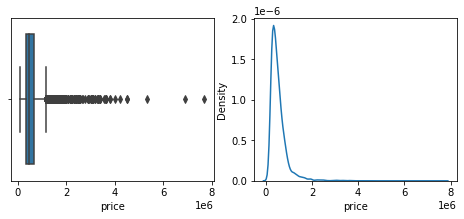

In [13]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(8,3))
sns.kdeplot(data=df, x="price",ax=axs[1])
sns.boxplot(data=df, x="price",ax=axs[0])

In [55]:
df.price.min(),df.price.max()

(80000.0, 7700000.0)

* price is highly right skewed

In [8]:
#program for percentage in barplots

def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

#### Bedrooms

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


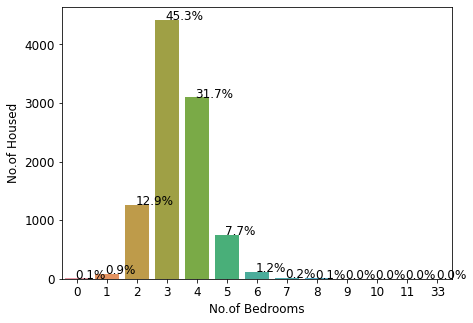

In [6]:
plt.figure(figsize = (7,5))
ax=sns.countplot('bedrooms', data=df)
plt.xticks(size=12)
plt.xlabel("No.of Bedrooms", size=12)
plt.yticks(size = 12)
plt.ylabel('No.of Houses', size = 12)

without_hue(ax,df.bedrooms)


In [19]:
a = df[(df['bedrooms'] == 2) | (df['bedrooms'] == 3) | (df['bedrooms'] == 4)]
b = df

len(a)/len(b)*100



89.8063722979203

 * 90% of the houses have got room numbers 2 , 3 or 4

#### Bathrooms

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


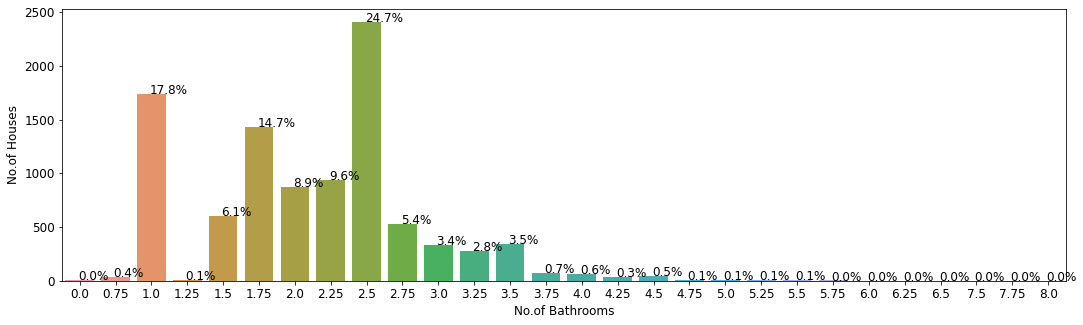

In [10]:
plt.figure(figsize = (18,5))
ax=sns.countplot('bathrooms', data=df)
plt.xticks(size=12)
plt.xlabel("No.of Bathrooms", size=12)
plt.yticks(size = 12)
plt.ylabel('No.of Houses', size = 12)

without_hue(ax,df.bathrooms)

In [17]:
houses=0
l = [1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5]
for i in l:
    a = df[(df['bathrooms'] == i)]
    houses = len(a) + houses

(houses/len(df))*100

96.9777686712427

96 % of the houses contain bathrooms ranging from 1 to 3.5

### Grades

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


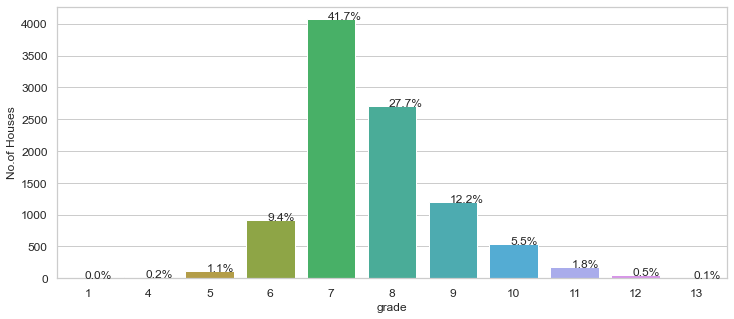

In [27]:
plt.figure(figsize = (12,5))
ax=sns.countplot('grade', data=df)
plt.xticks(size=12)
plt.xlabel("grade", size=12)
plt.yticks(size = 12)
plt.ylabel('No.of Houses', size = 12)

without_hue(ax,df.grade)

In [28]:
a = df[(df['grade'] == 6) | (df['grade'] == 7) | (df['grade'] == 8) | (df['grade'] == 9) ]
b = df

len(a)/len(b)*100


90.97428542157566

* Grades 6 , 7 , 8, 9 constitute almost 90 % of the houses under our analysis.

#### sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15

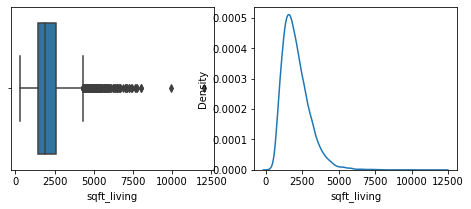

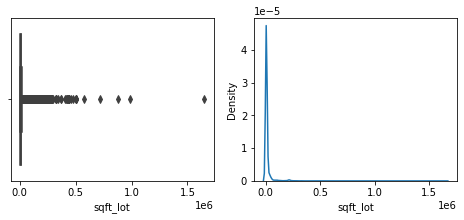

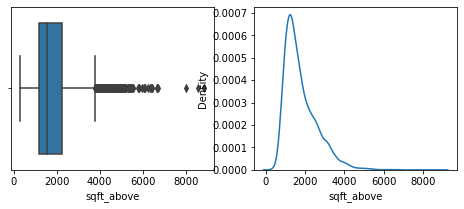

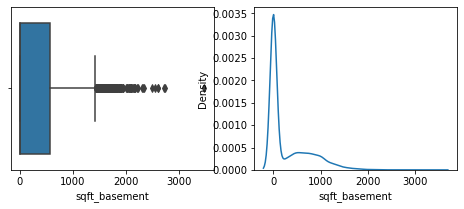

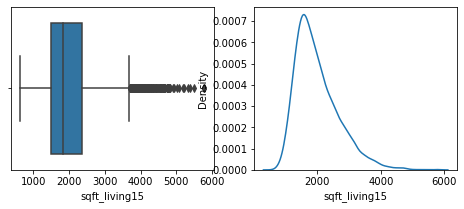

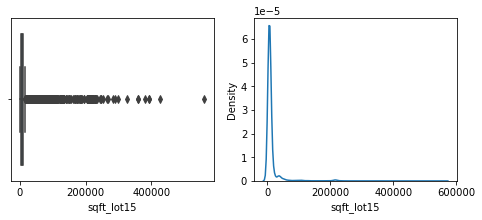

In [6]:
num = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']
for var in num:
    fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(8,3))
    sns.kdeplot(data=df, x=var,ax=axs[1])
    sns.boxplot(data=df, x=var,ax=axs[0])

* all these variables are highly right skewed and contain outliers as well

### Basement

In [30]:
a = df[(df['sqft_basement'] == 0) ]
b = df

len(a)/len(b)*100

60.864665505583446

<AxesSubplot:xlabel='sqft_basement'>

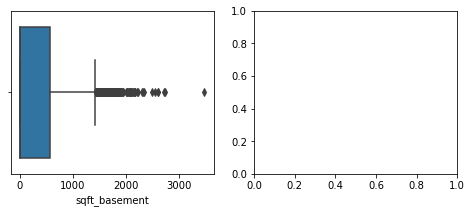

In [10]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(8,3))
sns.boxplot(data=df, x="sqft_basement",ax=axs[0])

In [22]:
df.sqft_basement.mode()

0    0
dtype: int64

60 % of the houses do not have basements

#### Floors

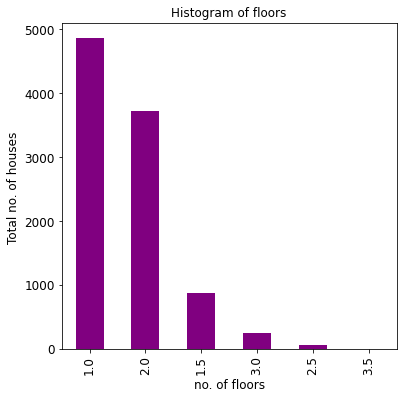

In [355]:
df["floors"].value_counts().plot(kind = 'bar',grid=False,figsize=(6,6),color="purple",fontsize=12)
plt.xlabel("no. of floors", fontsize = 12)
plt.ylabel("Total no. of houses ", fontsize = 12)
plt.title("Histogram of floors", fontsize = 12)
plt.show()

In [40]:
len(df[(df['floors'] == 1)|(df['floors'] == 2) ])/len(df)*100


87.95205409281836

* 87% of the houses contain 1 or 2 floors

#### Waterfront

In [48]:
len(df[df["waterfront"]==0])/len(df)*100

99.15992213912509

99 % of the houses do not have water front

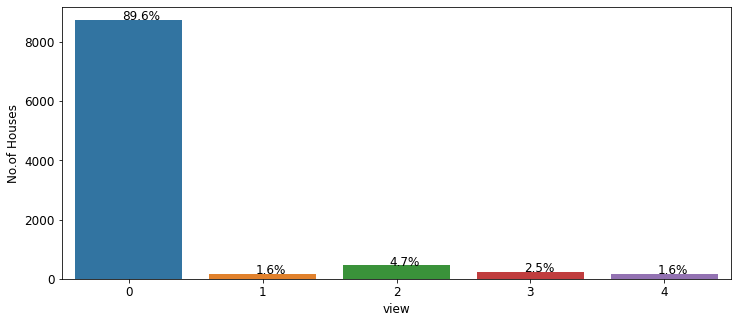

In [51]:
plt.figure(figsize = (12,5))
ax=sns.countplot('view', data=df)
plt.xticks(size=12)
plt.xlabel("view", size=12)
plt.yticks(size = 12)
plt.ylabel('No.of Houses', size = 12)

without_hue(ax,df.view)

* 89.6% of the houses has 0 view

***Questions to ask after univeriate analysis***

In [360]:
df["view"].value_counts()

0    8748
2     454
3     243
1     160
4     156
Name: view, dtype: int64

#### Condition

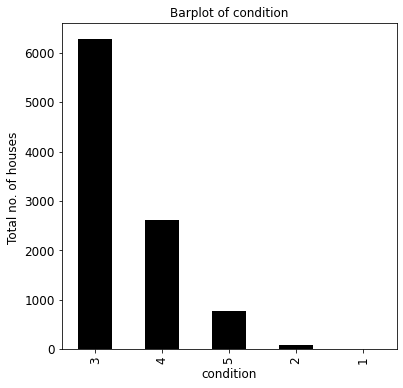

In [362]:
df["condition"].value_counts().plot(kind = 'bar',grid=False,figsize=(6,6),color="black",fontsize=12)
plt.xlabel("condition", fontsize = 12)
plt.ylabel("Total no. of houses ", fontsize = 12)
plt.title("Barplot of condition", fontsize = 12)
plt.show()

#### Zip Code

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


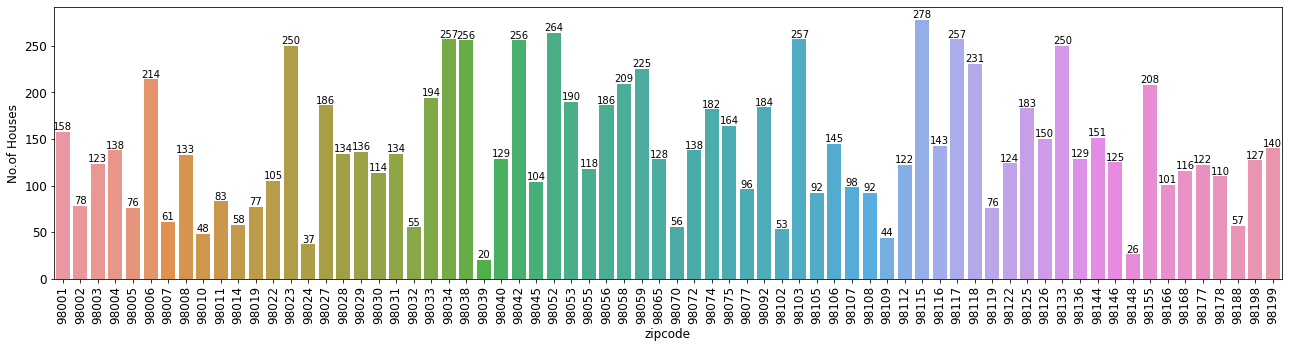

In [17]:
plt.figure(figsize = (22,5))
ax=sns.countplot('zipcode', data=df)
plt.xticks(size=12,rotation =90)
plt.xlabel("zipcode", size=12)
plt.yticks(size = 12)
plt.ylabel('No.of Houses', size = 12)

ax.bar_label(ax.containers[0])
plt.show()

* why price is highly left skewed? How to deal with outliers ? How it will affect our analysis? what to do to mitigate affect?
* What to do with outliers in bathroom (33) and bedroom ?
* Why 90 % of the houses had got grades 6,7,8,9? How grade is affecting the price?
* why all the sqft_living,sqft_lot','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15 have large outliers? What to do with those variables?
* 99 % of the houses donot have water front. What is the correlation between waterfront and price?Is it really important variable?
* almost 90% of the houses contain has view '0'. How View (0,1,2,3,4) affect the price?
* How does conditino affect the target variable?
* Time realted Variables like date,year_built, year_renovated doesnt seem to add up to the price that much anything we have to do make it affective variables?
* Zipcode might create problems in a regression model bcs it is a numerical variable, but really it should be treated as a categorical variable., ar What to do to solve this issue? then there is another issue becoz of size (71 zipcodes) is there anything to do reduce the number? that might help in reducing the complexity of the model.

### Bivariant Analysis

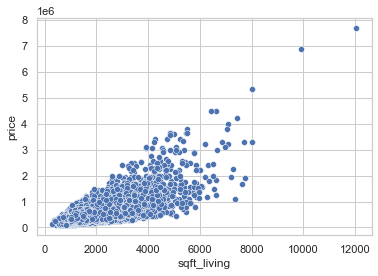

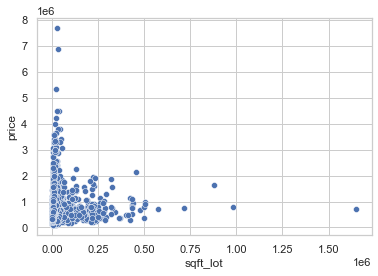

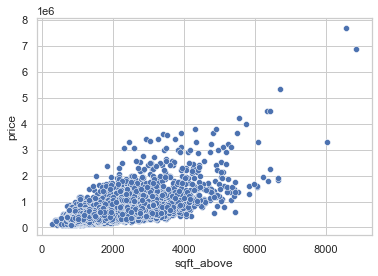

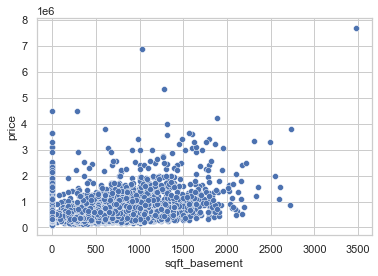

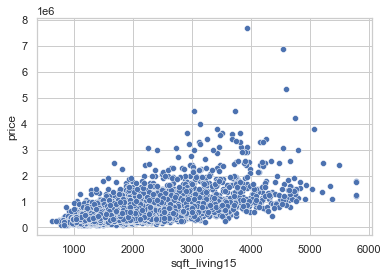

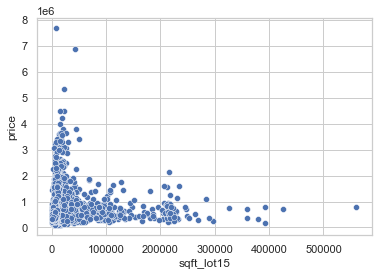

In [25]:
sns.set(style='whitegrid')


sns.set(style='whitegrid')
var_= ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']
for i in var_:
    sns.scatterplot(x=i,
                    y="price",
                    data=df)
    plt.show()

sqft_living,sqft_above,sqft_living15 seems to have a clear postive corerlation with the price.

#### Bedrooms and Price

#### Bathrooms and Price

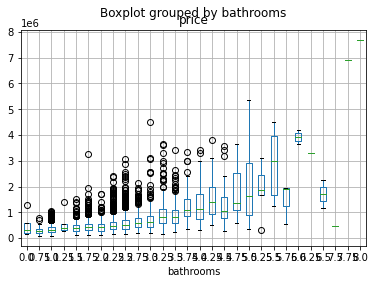

In [371]:
df.boxplot(column='price', by='bathrooms')
plt.show()

* Bathrooms and Bedrooms has positive correlation with price

#### bedrooms vs bathroom

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

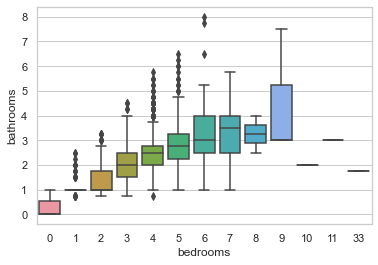

In [5]:
#no relation 
sns.set(style='whitegrid')

sns.boxplot(x="bedrooms",
                    y="bathrooms",
                    data=df)

Anomalies : 33 bedrooms - 2 bathrooms, 11 bedrroms - 3 bathrroms, 10 bedrrrroms and 2 bathrroms, 11 bedrroms and 3 bathrroms.

#### Floors and Price


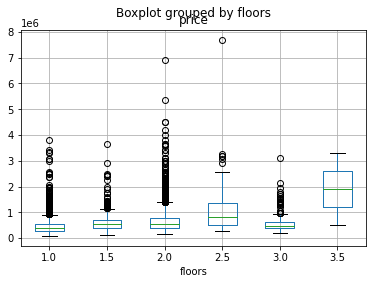

In [374]:
df.boxplot(column='price', by='floors')
plt.show()

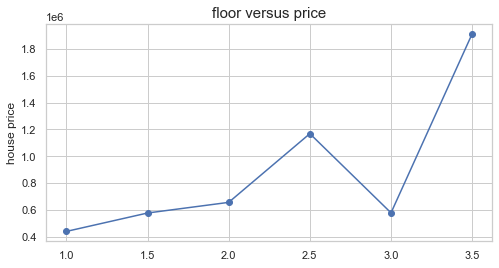

In [35]:

floor_price= df.groupby('floors')['price'].mean()
fig = plt.figure(figsize=(8,4))
plt.plot(floor_price ,'-o',)
plt.title('floor versus price' ,size = 15)
plt.ylabel('house price')
plt.show()

#### View and Price

In [53]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.006011,-0.002571,0.005821,-0.007559,-0.130303,0.007793,0.000834,0.023355,-0.015321,0.012491,-0.006447,-0.003660,0.027053,-0.024900,-0.012130,0.009167,0.034395,-0.001315,-0.137562
price,-0.006011,1.000000,0.300777,0.527512,0.705044,0.094146,0.262955,0.274953,0.399711,0.044754,0.665594,0.611450,0.322369,0.051737,0.120439,-0.055619,0.299191,0.023718,0.584829,0.077960
bedrooms,-0.002571,0.300777,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168,0.376457,0.018149
bathrooms,0.005821,0.527512,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697,0.566076,0.068722
sqft_living,-0.007559,0.705044,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170,0.758081,0.163545
sqft_lot,-0.130303,0.094146,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524,0.145285,0.719922
floors,0.007793,0.262955,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683,0.289238,-0.013269
waterfront,0.000834,0.274953,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227,0.097196,0.028499
view,0.023355,0.399711,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630,0.292435,0.079904
condition,-0.015321,0.044754,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514,-0.080423,0.002253


### Model Fitting

### Model 1

Based on Correlation selected features:
- bedrooms
- bathrooms
- sqft_living
- floors
- waterfront
- grade
- sqft_above
- sqft_basement
- sqft_living15
- price


In [68]:
df1 = df[['bedrooms','bathrooms','sqft_living','floors','waterfront','grade','sqft_above','sqft_basement','sqft_living15','price']]
df1.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'price'],
      dtype='object')

In [69]:
X = df1.drop("price",axis = 1)
y = df1.price

In [70]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)
len(X_train),len(X_valid)

(7320, 2441)

#### create linear regression object


In [71]:
>>> from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [72]:
y_pred = reg.predict(X_valid)
from sklearn.metrics import r2_score
r2_score(y_valid,y_pred)

0.5760040009429319

### Model 2 
* log transformation on skewed variables
- 'log price'
- 'log sqft_living'
- 'log sqft_lot'
- 'log sqft_above'
- 'log sqft_living15',
- 'log sqft_lot15',
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- sqft_basement

In [118]:
df2=df.copy()

In [119]:
num = ['sqft_living','sqft_lot','sqft_above','sqft_living15', 'sqft_lot15','price']
for var in num:
    df2[var] = np.log(df2[var])

In [120]:
df2.drop(["date","id","zipcode","lat","long","yr_renovated",'yr_built'], axis = 1, inplace = True) 
# dropping variables that show less collinearity with price

In [121]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,13.311329,4,3.00,7.580700,8.517193,1.0,0,0,5,7,6.956545,910,7.215240,8.517193
1,14.022525,4,4.50,8.597851,11.532042,1.0,0,0,3,11,8.266164,1530,8.468003,11.532042
2,13.056224,2,1.00,7.056175,8.699515,1.0,0,0,4,7,6.756932,300,7.192934,8.699515
3,12.644328,3,1.00,7.265430,9.898525,1.5,0,0,4,7,7.265430,0,7.484369,9.449121
4,12.899220,3,1.75,7.222566,9.177817,1.0,0,0,4,7,7.222566,0,7.222566,9.230927


In [122]:
X = df2.drop("price",axis = 1)
y = df2.price

In [123]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)
len(X_train),len(X_valid)

(7320, 2441)

#### create linear regression object


In [124]:
>>> from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [125]:
y_pred = reg.predict(X_valid)
from sklearn.metrics import r2_score
r2_score(y_valid,y_pred)

0.6240007144028319

### Model 3 

- log_price
- log sqft_living
- log sqft_living 15
- lof sqft_lot
- log sqft_lot 15
- lof sqft_above
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- presence_basement
- age_house

In [198]:
df3= df.copy()

In [199]:
num = ['sqft_living','sqft_lot','sqft_above','sqft_living15', 'sqft_lot15','price']
for var in num:
    df3[var] = np.log(df3[var])

In [200]:
df3['sqft_basement'] = df3['sqft_basement'].apply(lambda x: 1 if x!=0 else 0 ) 

In [201]:
df3["date"]= pd.to_datetime(df3["date"])
df3['year'] = pd.DatetimeIndex(df3['date']).year
df3["age of the house"] = df3['year']- df3['yr_built']

In [202]:
df3.drop(["date","id","zipcode","lat","long","yr_renovated",'yr_built',"year"], axis = 1, inplace = True) 
# dropping variables that show less collinearity with price

In [203]:
X = df3.drop("price",axis = 1)
y = df3.price

In [204]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)
len(X_train),len(X_valid)

(7320, 2441)

#### create linear regression object


In [205]:
>>> from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [206]:
y_pred = reg.predict(X_valid)

In [207]:
y_valid = np.exp(y_valid)
y_pred = np.exp(y_pred)

In [208]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_pred)

0.7044225684133092

### Model 4  

- log_price
- log sqft_living
- log sqft_living 15
- lof sqft_lot
- log sqft_lot 15
- lof sqft_above
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- presence_basement
- age_house
- zipcode_dummies

In [292]:
df4= df.copy()

In [293]:
num = ['sqft_living','sqft_lot','sqft_above','sqft_living15', 'sqft_lot15','price']
for var in num:
    df4[var] = np.log(df4[var])

In [294]:
df4['sqft_basement'] = df4['sqft_basement'].apply(lambda x: 1 if x!=0 else 0 ) 

In [295]:
df4["date"]= pd.to_datetime(df4["date"])
df4['year'] = pd.DatetimeIndex(df4['date']).year
df4["age of the house"] = df4['year']- df4['yr_built']

In [296]:
df4.drop(["date","id","lat","long","yr_renovated",'yr_built',"year"], axis = 1, inplace = True) 
# dropping variables that show less collinearity with price

In [297]:
df4 = pd.get_dummies(df4, columns = ["zipcode"],drop_first=True)

In [298]:
X = df4.drop("price",axis = 1)
y = df4.price

In [299]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)
len(X_train),len(X_valid)

(7320, 2441)

#### create linear regression object


In [300]:
>>> from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [301]:
y_pred = reg.predict(X_valid)

In [302]:
y_valid = np.exp(y_valid)
y_pred = np.exp(y_pred)

In [303]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_pred)

0.887283108981223

In [304]:
# MAPE
np.mean(np.abs((y_valid - y_pred)/y_valid))*100

13.600517245605417

In [257]:
import statsmodels.api as sm

X= sm.add_constant(X)
model = sm.OLS(y,X)

result = model.fit()

(result.summary())

C:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     919.0
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:05:08   Log-Likelihood:                 2972.9
No. Observations:                9761   AIC:                            -5778.
Df Residuals:                    9677   BIC:                            -5174.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.8747      0.071     96.808      0.000       6.736       7.014
bedrooms            -0.0076      0.003     -3.040      0.002      -0.013      -0.003
bathrooms            0.0388      0.004      9.143      0.000       0.030       0.047
sqft_living          0.2229      0.019     11.634      0.000       0.185       0.260
sqft_lot             0.0746      0.005     13.751      0.000       0.064       0.085
floors              -0.0151      0.006     -2.719      0.007      -0.026      -0.004
waterfront           0.4874      0.022     21.890      0.000       0.444       0.531
view                 0.0591      0.003     21.058      0.000       0.054       0.065
condition            0.0474      0.003     14.932      0.000       0.041       0.054
grade                0.0989      0.003     33.860      0.000       0.093       0.105
sqft_above           0.1984      0.019     10.453      0.000       0.161       0.236
sqft_basement        0.0309      0.008      3.820      0.000       0.015       0.047
sqft_living15        0.1409      0.010     14.290      0.000       0.122       0.160
sqft_lot15          -0.0210      0.006     -3.528      0.000      -0.033      -0.009
age of the house     0.0004      0.000      4.217      0.000       0.000       0.001
zipcode_98002       -0.0303      0.025     -1.216      0.224      -0.079       0.019
zipcode_98003        0.0085      0.022      0.392      0.695      -0.034       0.051
zipcode_98004        1.1417      0.021     53.541      0.000       1.100       1.184
zipcode_98005        0.6988      0.025     27.626      0.000       0.649       0.748
zipcode_98006        0.6443      0.019     33.524      0.000       0.607       0.682
zipcode_98007        0.6515      0.027     23.978      0.000       0.598       0.705
zipcode_98008        0.6420      0.021     30.172      0.000       0.600       0.684
zipcode_98010        0.2016      0.030      6.790      0.000       0.143       0.260
zipcode_98011        0.4168      0.024     17.080      0.000       0.369       0.465
zipcode_98014        0.3313      0.028     11.892      0.000       0.277       0.386
zipcode_98019        0.3114      0.025     12.451      0.000       0.262       0.360
zipcode_98022        0.0524      0.023      2.304      0.021       0.008       0.097
zipcode_98023       -0.0326      0.018     -1.785      0.074      -0.068       0.003
zipcode_98024        0.4335      0.033     13.061      0.000       0.368       0.499
zipcode_98027        0.4982      0.020     25.443      0.000       0.460       0.537
zipcode_98028        0.3952      0.021     18.723      0.000       0.354       0.437
zipcode_98029        0.5977      0.021     28.197      0.000       0.556       0.639
zipcode_98030        0.0353      0.022      1.600      0.110      -0.008       0.078
zipcode_98031        0.

## Checking Assumptions 


**1. checking linearity between Predictors and target variable**

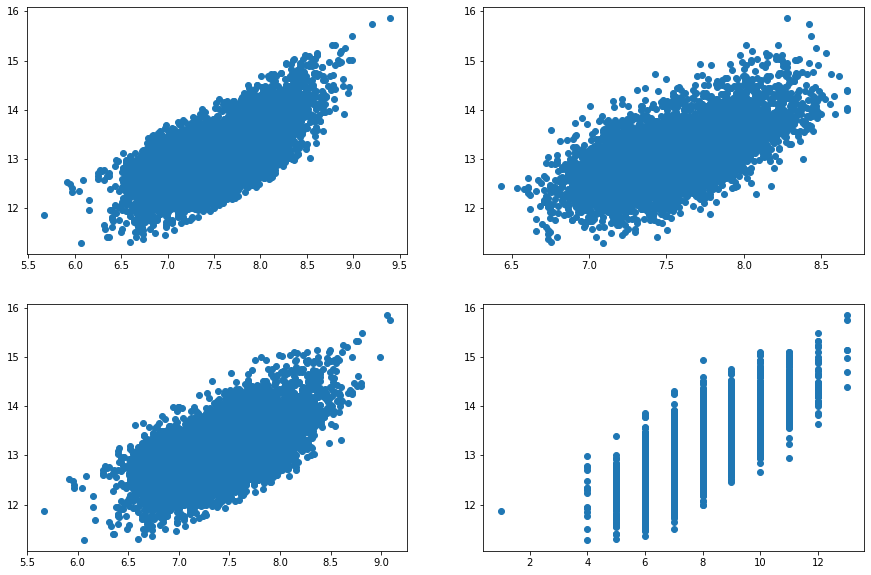

In [215]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X['sqft_living'], y)    #first graph 
ax2.scatter(X['sqft_living15'], y)  #second graph in the first row
ax3.scatter(X['sqft_above'], y)     #first graph in the second row
ax4.scatter(X['grade'], y)          #second graph in the second row
plt.show()

In [216]:
X.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'age of the house'],
      dtype='object')

**We can see linear relation ship between predictors and target variable price**


### Checking 2nd Assumption 
— No or little Multicollinearity

* for checking multicollinearity we do VIF and values near 3 or less than 3 shows no multicolinearity

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i]: variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])}

{'bedrooms': 1.7097549991362382,
 'bathrooms': 3.2140774367186866,
 'sqft_living': 20.125121690663796,
 'sqft_lot': 6.82273807806648,
 'floors': 2.356600943093224,
 'waterfront': 1.2012392567297292,
 'view': 1.3746972936904756,
 'condition': 1.2043095562659645,
 'grade': 3.065059846093278,
 'sqft_above': 19.87587031544406,
 'sqft_basement': 4.572567868237109,
 'sqft_living15': 2.7798847694987376,
 'sqft_lot15': 6.559735891524584,
 'age of the house': 1.7746234180395704}

- **Here we can see VIF values greater than 5, which shows multicollinearity between the predictors** 
- **we can try removing each variable that having higher VIF step by step**
- **Here we are removing sqft_living since it has the highest VIF value**

### Checking 3rd Assumption
-**Homoscedasticity - constant variance of residuals**

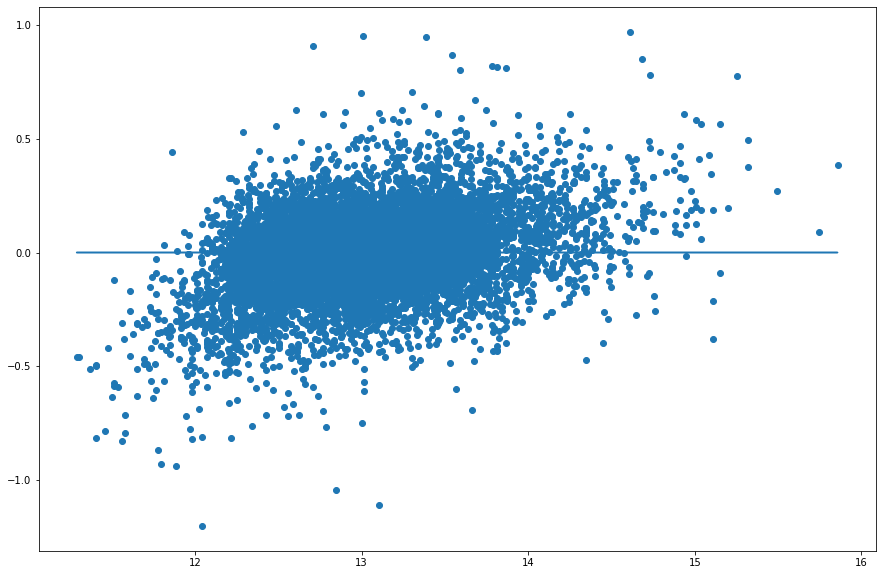

In [28]:

residuals = result.resid
plt.scatter(y, residuals)
plt.plot(y, [0]*len(y))

**we can see there is no evident pattern in the graph, it shows constant variance**

### Checking 4th Assumption 
- **No Autocorrelation of errors**

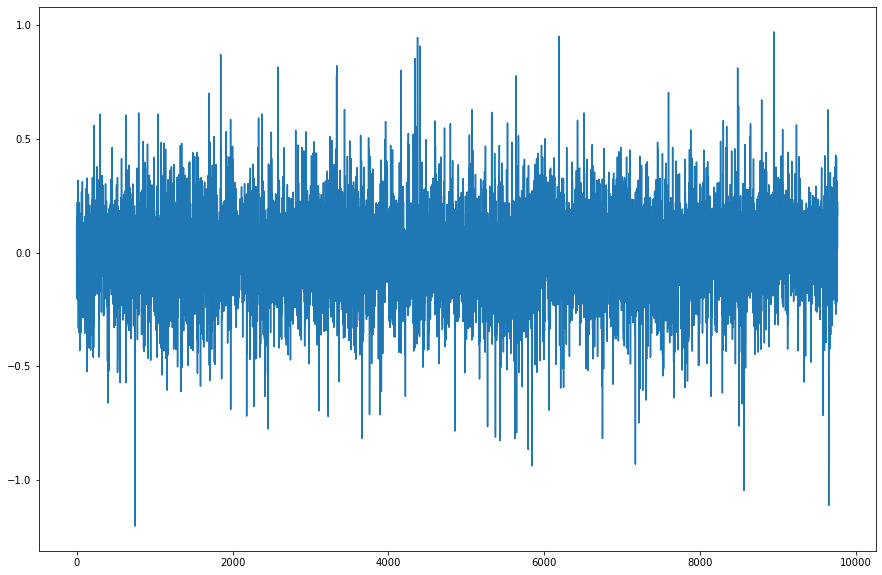

In [29]:
plt.plot(residuals.index, residuals)   # we can see no pattern in the 

**we could see no pattern in the correaltion graphs as well** 

# Checking 5th Assumptions - Residual Normality

C:\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


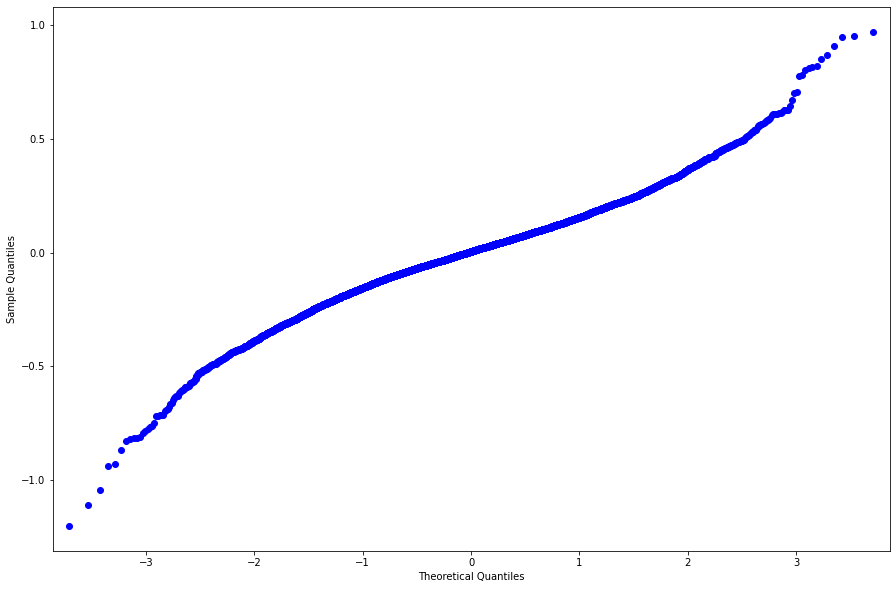

In [30]:
residuals = result.resid
sm.qqplot(residuals)
plt.show()


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

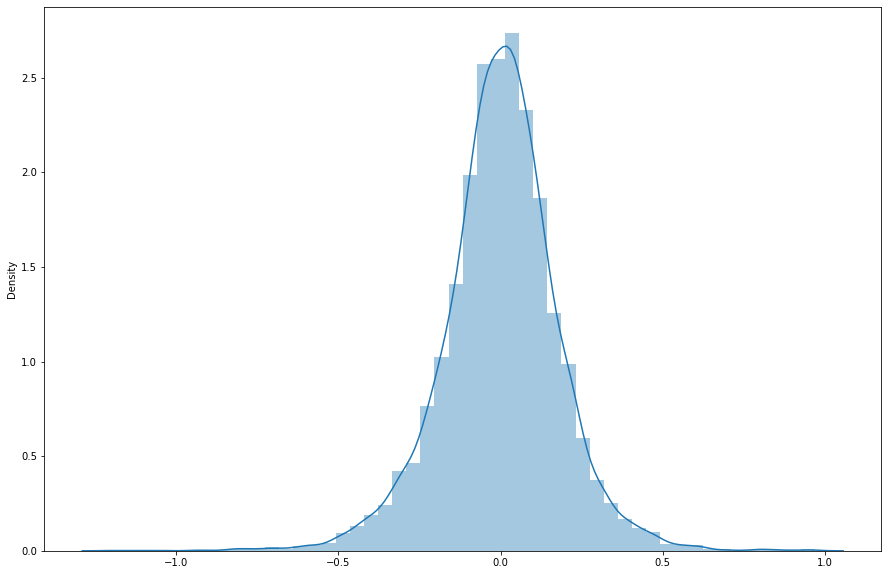

In [31]:
import seaborn as sns
sns.distplot(residuals)

- **The Q-Q plot shows normailty (almost a straight line)**
- **Frequency plot shows normailty as well**

# Checking 6th Assumptions 
**Independence of observations
- we cant check this assumptions

# Checking 7th Assumptions 
- There should be no relation between residuals and independent vatiables

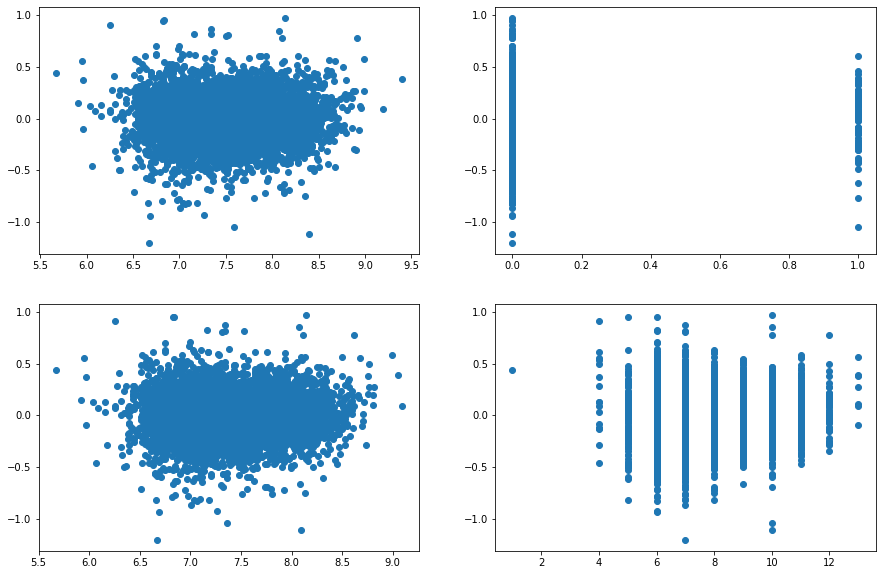

In [32]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X['sqft_living'], residuals)            
ax2.scatter(X['waterfront'], residuals)
ax3.scatter(X['sqft_above'], residuals)
ax4.scatter(X['grade'], residuals)
plt.show()

- **any of these Graphs between residuals and predictors shows no relation** 
- **So assumption holds True**

# Running the Model on Test Data

In [280]:
test = pd.read_csv("kc_house_test_data.csv")
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


In [281]:
num = ['sqft_living','sqft_lot','sqft_above','sqft_living15', 'sqft_lot15','price']
for var in num:
    test[var] = np.log(test[var])

In [282]:
test['sqft_basement'] = test['sqft_basement'].apply(lambda x: 1 if x!=0 else 0 ) 

In [283]:
test["date"]= pd.to_datetime(test["date"])
test['year'] = pd.DatetimeIndex(test['date']).year
test["age of the house"] = test['year']- test['yr_built']

In [284]:
test.drop(["date","id","lat","long","yr_renovated",'yr_built',"year"], axis = 1, inplace = True) 
# dropping variables that show less collinearity with price

In [285]:
test = pd.get_dummies(test, columns = ["zipcode"],drop_first=True)

In [286]:
X = test.drop("price",axis = 1)
y = test.price

#### create linear regression object


In [287]:
>>> from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [288]:
y_pred = reg.predict(X)

In [289]:
y = np.exp(y)
y_pred = np.exp(y_pred)

In [290]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.8814635118275367

In [291]:
# MAPE
np.mean(np.abs((y - y_pred)/y))*100

13.604872233164372